#### Load dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist_dataset=fetch_openml("mnist_784", as_frame=False)

In [3]:
mnist_dataset

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784)),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',


#### SGDClassifier

In [4]:
mnist_dataset.data.shape

(70000, 784)

In [5]:
X, y =mnist_dataset.data, mnist_dataset.target

In [6]:
import matplotlib.pyplot as plt

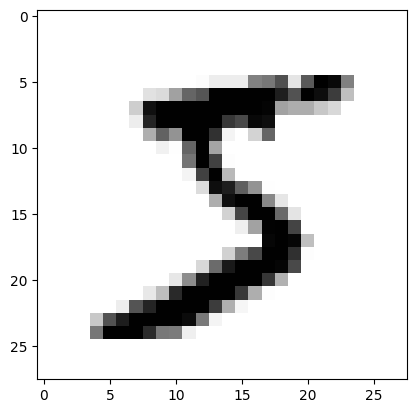

In [7]:
plt.imshow(X[0].reshape(28, 28), cmap="binary")

In [8]:
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
y_train8 = (y_train=="8")
y_test8 = (y_test == "8")

In [11]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train8)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [12]:
sgd.predict(X_train[-3:])

array([False, False,  True])

### Confusion Matrix

In [13]:
sgd.score(X_train, y_train8)

0.9304666666666667

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(sgd, X_train, y_train8, cv=5, scoring="accuracy")

array([0.93491667, 0.92491667, 0.91625   , 0.93141667, 0.92908333])

In [16]:
from sklearn.dummy import DummyClassifier

In [17]:
dummy_c=DummyClassifier()
dummy_c.fit(X_train, y_train8)

,strategy,'prior'
,random_state,None
,constant,None


In [18]:
dummy_c.predict(X_train).sum()

np.int64(0)

In [19]:
cross_val_score(dummy_c, X_train, y_train8, cv=5, scoring="accuracy")

array([0.9025    , 0.9025    , 0.9025    , 0.9025    , 0.90241667])

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [21]:
skf= StratifiedKFold(n_splits=5)

In [22]:
for train_i, test_i in skf.split(X_train, y_train8):
    cloned_sgd=clone(sgd)
    X_train_f=X_train[train_i]
    y_train8_f=y_train8[train_i]
    X_test_f=X_train[test_i]
    y_test_f=y_train8[test_i]

    cloned_sgd.fit(X_train_f, y_train8_f)
    y_pred=cloned_sgd.predict(X_test_f)
    correct_prediction=(y_pred==y_test_f).sum()
    print(correct_prediction/len(y_pred))

0.9386666666666666
0.9106666666666666
0.9279166666666666
0.9331666666666667
0.9091666666666667


In [23]:
from sklearn.model_selection import cross_val_predict

In [24]:
y_pred=cross_val_predict(sgd, X_train, y_train8, cv=5)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_train8, y_pred)

array([[51559,  2590],
       [ 2085,  3766]])

In [27]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [28]:
precision_score(y_train8, y_pred)

0.5925110132158591

In [29]:
recall_score(y_train8, y_pred)

0.6436506580071782

In [30]:
f1_score(y_train8, y_pred)

0.6170230195789301

### precisin-Recall Trade-off

In [31]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [32]:
sgd.decision_function([X_train[0]])

array([-9313.09258167])

In [33]:
y_scores=cross_val_predict(sgd, X_train, y_train8, cv=5, method="decision_function")

In [34]:
from sklearn.metrics import precision_recall_curve

In [35]:
prec, recall, thresholds=precision_recall_curve(y_train8, y_scores)

In [36]:
import matplotlib.pyplot as plt

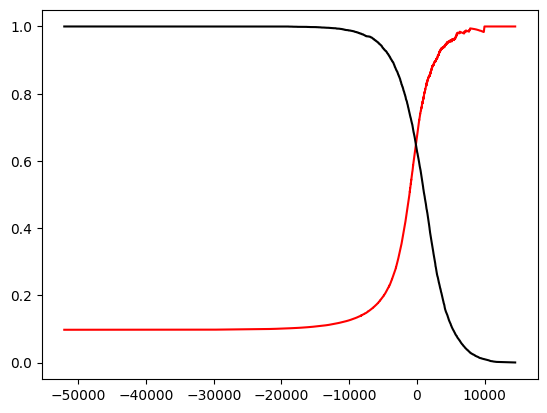

In [37]:
fig, ax = plt.subplots()
ax.plot(thresholds, prec[:-1], "r", label="Precision")
ax.plot(thresholds, recall[:-1], "black", label="Recall")

Text(0, 0.5, 'precision')

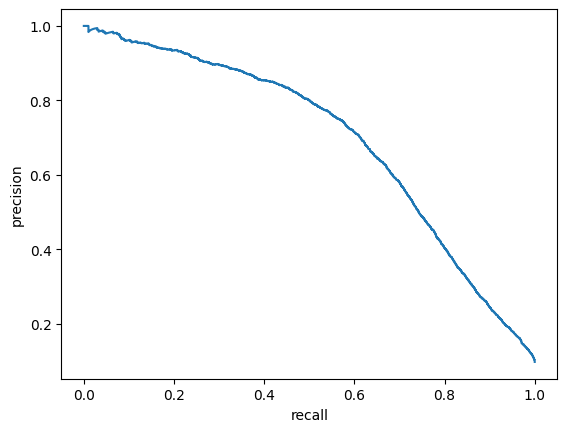

In [38]:
plt.plot(recall, prec)
plt.xlabel("recall")
plt.ylabel("precision")

In [39]:
thresh_for_80_prec=thresholds[(prec >= 0.8).argmax()]
thresh_for_80_prec

np.float64(1096.1064045791206)

In [40]:
y_pred_80_prec=(y_scores >= thresh_for_80_prec)

In [41]:
y_pred_80_prec

array([False, False, False, ..., False, False, False], shape=(60000,))

In [42]:
precision_score(y_train8, y_pred_80_prec)

0.8001640240568617

In [43]:
recall_score(y_train8, y_pred_80_prec)

0.5002563664330884

### ROC curve

In [44]:
from sklearn.metrics import roc_curve

In [45]:
fpr, tpr, thresholds=roc_curve(y_train8, y_scores)

Text(0, 0.5, 'TPR')

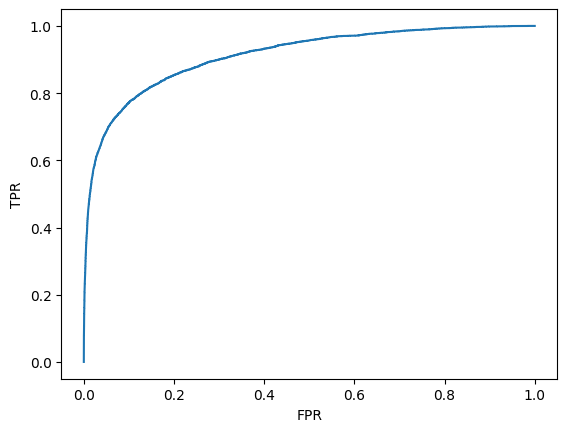

In [46]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [47]:
from sklearn.metrics import roc_auc_score

In [48]:
roc_auc_score(y_train8, y_scores)

0.9126020005712981

### Multiclass classification

In [49]:
from sklearn.svm import SVC

In [50]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], shape=(60000,), dtype=object)

In [52]:
svc =SVC()
svc.fit(X_train[:1000], y_train[:1000])

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [53]:
svc.predict([X_train[0]])

array(['5'], dtype=object)

In [54]:
svc.decision_function([X_train[0]])

array([[ 1.75828215,  2.74956232,  6.13809559,  8.2853702 , -0.28728967,
         9.30119996,  0.74228825,  3.79256174,  7.20847395,  4.85762716]])

In [55]:
svc.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [56]:
from sklearn.multiclass import OneVsRestClassifier
ovr_svm=OneVsRestClassifier(SVC())

In [57]:
ovr_svm.fit(X_train[:1000], y_train[:1000])

,estimator,SVC()
,n_jobs,None
,verbose,0
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001


In [58]:
ovr_svm.predict([X_train[0]])

array(['5'], dtype='<U1')

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay

In [62]:
y_pred=cross_val_predict(svc, X_train[:1000], y_train[:1000], cv=3)

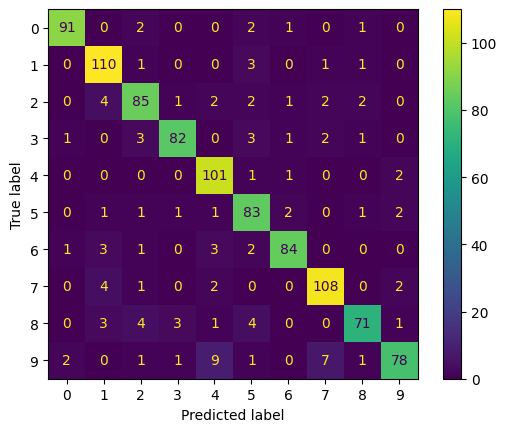

In [63]:
ConfusionMatrixDisplay.from_predictions(y_train[:1000], y_pred)

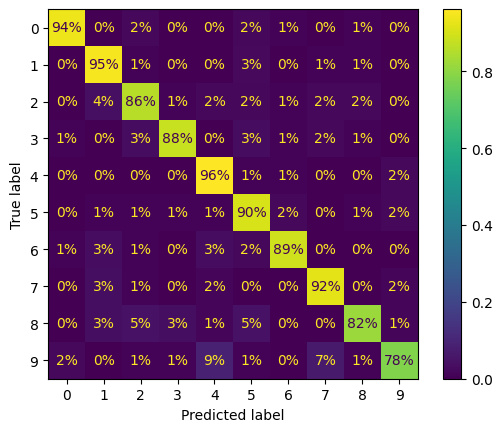

In [65]:
ConfusionMatrixDisplay.from_predictions(y_train[:1000], y_pred, normalize="true", values_format=".0%")

In [66]:
weights=(y_pred != y_train[:1000])

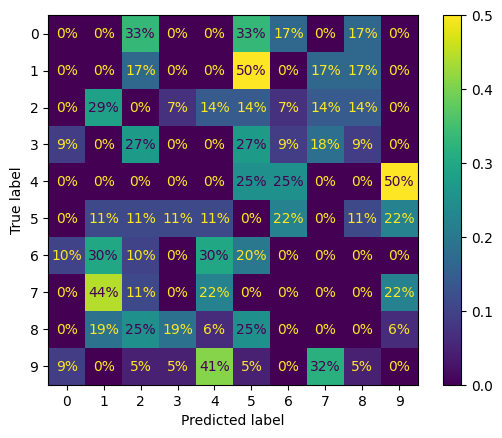

In [67]:
ConfusionMatrixDisplay.from_predictions(y_train[:1000], y_pred, sample_weight=weights, normalize="true", values_format=".0%")

#### Multioutput classification

In [76]:
X_train.shape

(60000, 784)

In [77]:
import numpy as np
np.random.seed(40)
image_noise = np.random.randint(0, 100, X_train.shape)
X_train_noisy = X_train + image_noise
image_noise = np.random.randint(0, 100, X_test.shape)
X_test_noisy = X_test + image_noise
y_train_mc = X_train
y_test_mc = X_test 

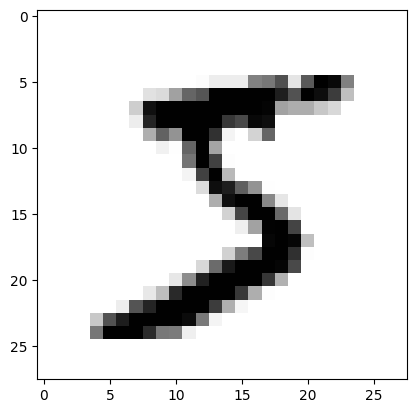

In [78]:
plt.imshow(X_train[0].reshape(28, 28), cmap="binary")

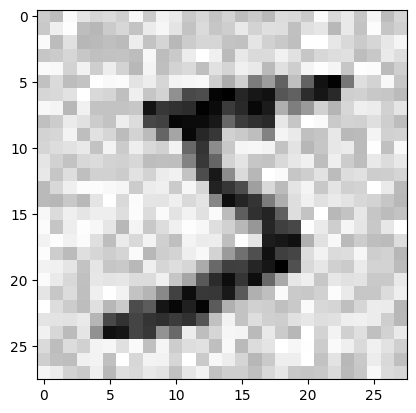

In [79]:
plt.imshow(X_train_noisy[0].reshape(28, 28), cmap="binary")

In [80]:
knn = KNeighborsClassifier()
knn.fit(X_train_noisy, y_train_mc)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


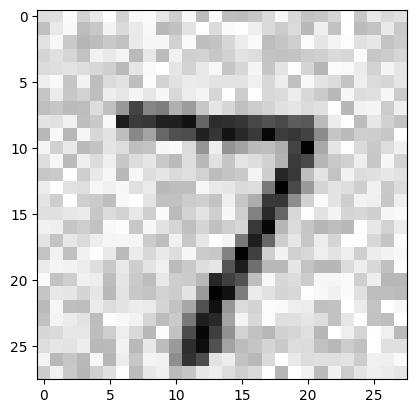

In [81]:
plt.imshow(X_test_noisy[0].reshape(28, 28), cmap="binary")

In [82]:
pred = knn.predict([X_test_noisy[0]])

In [83]:
pred.shape

(1, 784)

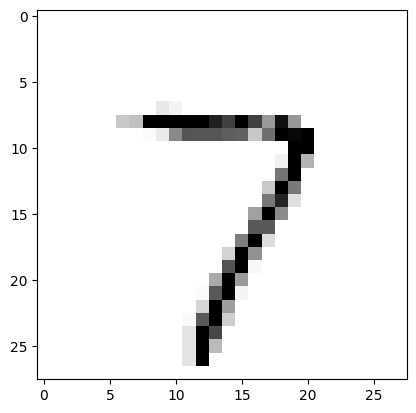

In [84]:
plt.imshow(pred.reshape(28, 28), cmap="binary")